In [1]:
import pandas as pd
import numpy as np

c:\Users\singer\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#this is what we want to predict from our model (y)
df['NObeyesdad']

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [5]:
#check whether there are any missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Numerical features
Age = 'Age'
Height = 'Height'
Weight = 'Weight'
FCVC = 'FCVC'
NCP = 'NCP'
CH2O = 'CH2O'
FAF = 'FAF'
TUE = 'TUE'

# categorical features
Gender = 'Gender'
MTRANS = 'MTRANS'
Obesity_Level='NObeyesdad'

## Binary features
FamilyOverweight = 'family_history_with_overweight'
FAVC = 'FAVC'
SMOKE = 'SMOKE'
SCC = 'SCC'

## Frequency features
CAEC = 'CAEC'
CALC = 'CALC'

In [7]:
df_copy=df.copy()

In [8]:
#function for binary encoding
def encode_binary(column, true_val):
    return np.where(column == true_val, 1, 0)


In [9]:
# Feature Encoding 
BinaryFeatures = [FamilyOverweight,FAVC,SMOKE,SCC]
df_copy[BinaryFeatures] = encode_binary(df_copy[BinaryFeatures],'yes')

In [10]:
df[BinaryFeatures] = encode_binary(df[BinaryFeatures],'yes')

In [11]:
df_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
#BMI is a great feature to measure whether obesity or not
df_copy['BMI']=df[Weight]/(df[Height]**2)
df['BMI']=df[Weight]/(df[Height]**2)
df_copy.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [14]:
"""here we generate unique dataframes for each obesity type which makes it easier for us 
to analyse the behaviour of the obesity level with each feature """

insufficient_weight_df = df_copy[df_copy[Obesity_Level] == 'Insufficient_Weight']
Normal_Weight_df=df_copy[df_copy[Obesity_Level] == 'Normal_Weight']
Overweight_Level_I_df=df_copy[df_copy[Obesity_Level] == 'Overweight_Level_I']
Overweight_Level_II_df=df_copy[df_copy[Obesity_Level] == 'Overweight_Level_II']
Obesity_Type_I_df=df_copy[df_copy[Obesity_Level] == 'Obesity_Type_I']
Obesity_Type_II_df=df_copy[df_copy[Obesity_Level] == 'Obesity_Type_II']
Obesity_Type_III_df=df_copy[df_copy[Obesity_Level] == 'Obesity_Type_III']



#### BMI

In [15]:
summary = df_copy.groupby(Obesity_Level)['BMI'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('25%', lambda x: x.quantile(0.25)),
    ('50%', lambda x: x.median()),
    ('75%', lambda x: x.quantile(0.75))
    
])


# Optional: round for cleaner display
summary = summary.round(5)

summary

,mean,std,25%,50%,75%
NObeyesdad,,,,,
Insufficient_Weight,17.40425,0.78623,17.09550,17.54745,17.90624
Normal_Weight,22.01415,1.84202,20.67315,22.14533,23.68854
Obesity_Type_I,32.25564,1.13096,31.37062,32.20004,32.97374
Obesity_Type_II,36.72342,1.29013,35.75052,36.41780,37.88069
Obesity_Type_III,42.27375,2.57869,40.59119,41.94262,43.83860
Overweight_Level_I,25.99077,0.66082,25.57797,25.97793,26.38856
Overweight_Level_II,28.21523,0.82786,27.61299,28.15242,28.88920


### 📊 Understanding BMI Distribution with Quartiles and IQR Ranges

The BMI values across different obesity categories can be better understood using quartile statistics:

- **25% (Q1)**: The first quartile — 25% of the values fall below this.
- **75% (Q3)**: The third quartile — 75% of the values fall below this.
- **IQR (Interquartile Range)**: The middle 50% of the data, represented as the range from Q1 to Q3.

#### 🔍 Example: IQR Ranges by Category

| Obesity Level        | IQR Range [Q1 – Q3]             |
|----------------------|---------------------------------|
| Insufficient_Weight  | [17.09550, 17.90624]            |
| Normal_Weight        | [20.67315, 23.68854]            |
| Overweight_Level_I   | [25.57797, 26.38856]            |
| Overweight_Level_II  | [27.61299, 28.88920]            |
| Obesity_Type_I       | [31.37062, 32.97374]            |
| Obesity_Type_II      | [35.75052, 37.88069]            |
| Obesity_Type_III     | [40.59119, 43.83860]            |

These **IQR ranges** represent where the **middle 50%** of BMI values lie for each category.

➡️ Notably, the IQR ranges **do not overlap** across categories — for instance:
- `Normal_Weight` has an IQR of **[20.67, 23.69]**
- `Overweight_Level_I` starts at **25.58**, well above that

This indicates that the central BMI values for each group are **well-separated**, reinforcing the quality of the data and suggesting meaningful distinctions between the obesity levels.


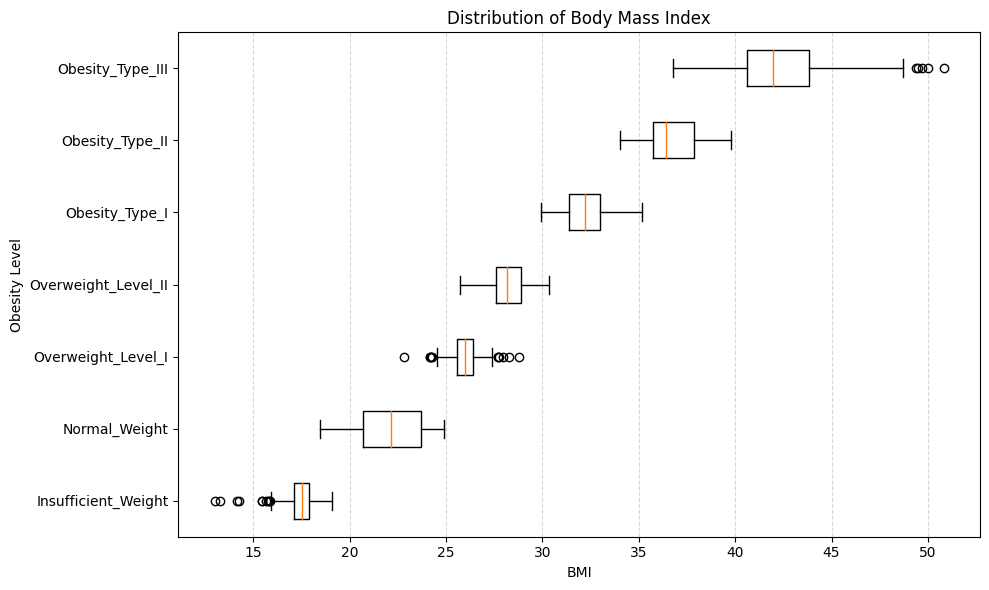

In [16]:
import matplotlib.pyplot as plt
data = [
    insufficient_weight_df['BMI'], Normal_Weight_df['BMI'], Overweight_Level_I_df['BMI'],
    Overweight_Level_II_df['BMI'], Obesity_Type_I_df['BMI'], Obesity_Type_II_df['BMI'], Obesity_Type_III_df['BMI']
]

labels = [
    'Insufficient_Weight', 'Normal_Weight',
    'Overweight_Level_I', 'Overweight_Level_II',
    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, patch_artist=False, labels=labels, showfliers=True)
plt.ylabel("Obesity Level")
plt.xlabel("BMI")
plt.title("Distribution of Body Mass Index")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📦 Understanding the Box Plot: BMI Distribution and Whiskers

This box plot shows the distribution of Body Mass Index (BMI) for each obesity category using the five-number summary:

- **Box edges** represent the 25th percentile (Q1) and 75th percentile (Q3)
- The **line inside the box** shows the **median (50th percentile)**
- The **whiskers** extend to the **lowest and highest BMI values** that fall within the following calculated range:

\[
\text{Whisker Range} = [Q1 - 1.5 \times IQR,\; Q3 + 1.5 \times IQR]
\]

This range defines what’s considered "typical" variation. Any value **outside this range** is treated as an **outlier**, shown as a small circle.

#### 🔍 Example:
For the `Insufficient_Weight` category:
- **Q1** = 17.09550
- **Q3** = 17.90624
- **IQR** = 0.81074
- **Whisker range** = [~15.88, ~19.12]

Only BMI values **within this range** are connected by the whiskers. Anything beyond it is considered an **outlier**.

This whisker-based rule helps separate **true variability** from **extreme values**, giving a clearer picture of the BMI distribution in each group.


In [17]:
summary=df_copy.groupby(Obesity_Level)[FamilyOverweight].agg([
    ('count' , lambda x: x.count()),
    ('yes' , lambda x: ((x.sum())/(x.count())*100)),
    ('no' , lambda x: (((x.count() - x.sum())/(x.count()))*100)) 
])

summary_=summary.round(2)
custom_order = [0, 1, 5, 6, 2,3,4]  # list of row indices

summary=summary_.drop('count', axis=1)
summary = summary.iloc[custom_order]
summary_.iloc[custom_order]


,count,yes,no
NObeyesdad,,,
Insufficient_Weight,272,46.32,53.68
Normal_Weight,287,54.01,45.99
Overweight_Level_I,290,72.07,27.93
Overweight_Level_II,290,93.79,6.21
Obesity_Type_I,351,98.01,1.99
Obesity_Type_II,297,99.66,0.34
Obesity_Type_III,324,100.00,0.00


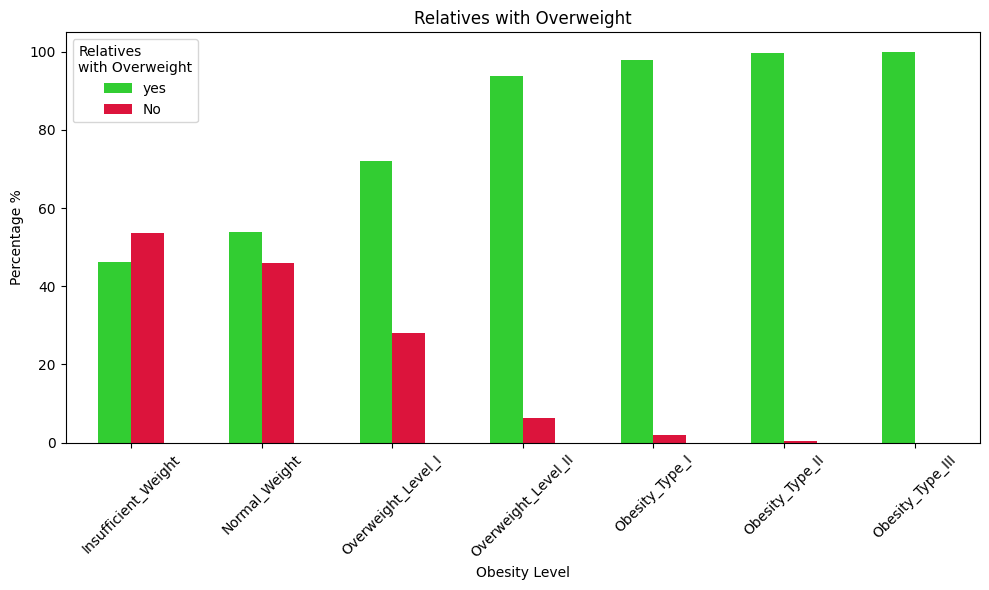

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot setup
ax = summary.plot(kind='bar', figsize=(10, 6), color=['limegreen', 'crimson'])

# Labels and title
plt.title('Relatives with Overweight')
plt.xlabel('Obesity Level')
plt.ylabel('Percentage %')
plt.legend(title='Relatives\nwith Overweight', labels=['yes', 'No'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Physical Activity
FAF: How often do you have physical activity?

In [19]:
summary=df_copy.groupby(Obesity_Level)['FAF'].agg([
    ('mean' , 'mean'),
    ('std' ,'std'),
    ('variance' , lambda x:(x.std())**2),
    ('25%' , lambda x:x.quantile(0.25)),
    ('50%' , lambda x:x.quantile(0.50)),
    ('75%' , lambda x:x.quantile(0.75)),
])

custom_order = [0, 1, 5, 6, 2,3,4]  # list of row indices
summary=summary.iloc[custom_order]
summary.round(4)

,mean,std,variance,25%,50%,75%
NObeyesdad,,,,,,
Insufficient_Weight,1.2501,0.8566,0.7338,0.4255,1.3399,2.0000
Normal_Weight,1.2474,1.0164,1.0330,0.0000,1.0000,2.0000
Overweight_Level_I,1.0568,0.8516,0.7252,0.3238,1.0000,1.6465
Overweight_Level_II,0.9581,0.8247,0.6802,0.1210,0.9607,1.4387
Obesity_Type_I,0.9867,0.8947,0.8004,0.0171,0.9906,1.6925
Obesity_Type_II,0.9719,0.5812,0.3378,0.5827,0.9944,1.3762
Obesity_Type_III,0.6648,0.7329,0.5371,0.0000,0.2227,1.4612


### 🏃‍♂️ Physical Activity and Obesity Level – Statistical Summary and Interpretation

#### 🔍 Key Observations:

1. **Mean Decreases with Increasing Obesity Level**:
   - The **mean values decrease** progressively from `Insufficient_Weight` (~1.25) to `Obesity_Type_III` (~0.66).
   - This suggests that individuals in **higher obesity categories tend to engage in physical activity less frequently or with lower intensity**.
   - Therefore, **physical activity appears to inversely correlate with obesity level**, supporting the idea that lower physical activity contributes to higher obesity.

2. **High Variance in All Groups**:
   - The **standard deviation is relatively high**, even in higher obesity levels (e.g., SD = 0.89 in `Obesity_Type_I`, 0.73 in `Obesity_Type_III`).
   - This means there is **wide variability** in activity levels **within each obesity group**:
     - Some individuals in higher obesity categories **do exercise regularly**, while others do very little or none.
     - Similarly, even in lower obesity levels, there are individuals with **very low activity**.
   - This suggests that **behavioral factors vary widely even within the same obesity classification**.

4. **Upper Quartile Remains Relatively High**:
   - Despite lower averages in higher obesity groups, the **75th percentile remains above 1.4–1.6** in many groups.
   - This means the **most active 25%** of individuals in each group **still show decent physical activity levels**, again reinforcing **intra-group variability**.

#### 📌 Conclusion:

While physical activity appears to be **negatively correlated with obesity level** on average, the **high variance** and wide interquartile ranges suggest that **obesity is not solely determined by physical activity**. There are individuals with high BMI who still maintain regular activity, and those with low BMI who are sedentary.

This reflects the **complex nature of obesity**, influenced not only by exercise but also by **diet, genetics, metabolism, and lifestyle factors**.


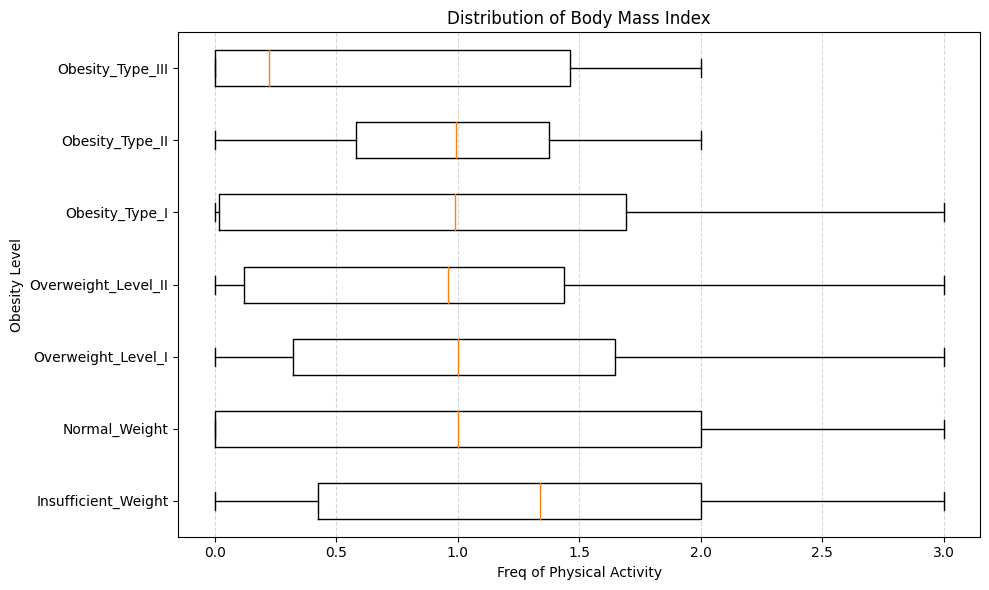

In [20]:
import matplotlib.pyplot as plt
data = [
    insufficient_weight_df['FAF'], Normal_Weight_df['FAF'], Overweight_Level_I_df['FAF'],
    Overweight_Level_II_df['FAF'], Obesity_Type_I_df['FAF'], Obesity_Type_II_df['FAF'], Obesity_Type_III_df['FAF']
]

labels = [
    'Insufficient_Weight', 'Normal_Weight',
    'Overweight_Level_I', 'Overweight_Level_II',
    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, patch_artist=False, labels=labels, showfliers=True)
plt.ylabel("Obesity Level")
plt.xlabel("Freq of Physical Activity")
plt.title("Distribution of Body Mass Index")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [21]:
#feature encoding for categorical features
mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2 , 'Obesity_Type_II':3 , 'Obesity_Type_III':4 , 
           'Overweight_Level_I':5 , 'Overweight_Level_II' :6 }
df[Obesity_Level] = df[Obesity_Level].map(mapping)


In [22]:
df[Obesity_Level]

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64

In [23]:
from scipy import stats

_Data = df[[FAF,Obesity_Level]].query(f'0 < {Obesity_Level} < 6')
_Result = stats.spearmanr(_Data[FAF],_Data[Obesity_Level],alternative='less')

print(f'Spearman Correlation Coefficient :: {_Result.statistic}\nP Value :: {_Result.pvalue}')

Spearman Correlation Coefficient :: -0.08482658236940055
P Value :: 0.0004160682088397032


#### Interpretation:

- The **correlation coefficient (ρ = –0.0848)** indicates a **very weak negative correlation**:
  > As the frequency of physical activity increases, obesity level tends to slightly decrease , but the effect is minimal.

- The **p-value (0.00042)** is **statistically significant** (p < 0.05), meaning:
  > This weak relationship is **unlikely due to random chance**.

#### ⚠️ Important Insight:

Despite statistical significance, the correlation strength is very low, suggesting that:
- The **frequency of physical activity alone** is **not a strong predictor** of obesity level in this dataset.
- There are likely many individuals who exercise regularly but are still obese, and others who are not obese despite low physical activity.

#### 📌 Conclusion:

While physical activity is an important health behavior, its **isolated impact on obesity** appears to be **minimal and inconsistent** in this dataset.


#### High Caloric Food

In [24]:
summary=df_copy.groupby(Obesity_Level)['FAVC'].agg([
    ('yes' , lambda x: ((x.sum())/(x.count())*100)),
    ('No' , lambda x: ((x.count()-x.sum())/(x.count())*100))
    
])
temp=[0,1,5,6,2,3,4]
summary=summary.iloc[temp]
summary

,yes,No
NObeyesdad,,
Insufficient_Weight,81.250000,18.750000
Normal_Weight,72.473868,27.526132
Overweight_Level_I,92.413793,7.586207
Overweight_Level_II,74.482759,25.517241
Obesity_Type_I,96.866097,3.133903
Obesity_Type_II,97.643098,2.356902
Obesity_Type_III,99.691358,0.308642


### 🍔 High-Calorie Food Consumption vs. Obesity Level

The table shows the percentage of individuals who frequently consume high-calorie foods across different obesity categories.

#### 📊 Key Points:

- The **consumption of high-calorie foods** is generally associated with higher obesity levels, especially in `Obesity_Type_I`, `II`, and `III`, where over **96–99%** report frequent consumption.
- However, this relationship is **not strictly linear**:
  - `Insufficient_Weight` individuals also show a **surprisingly high consumption rate** (81%).
  - `Normal_Weight` and `Overweight_Level_II` have **lower-than-expected percentages** (around 72% and 74%), creating a **dip** in the trend.
  
#### ⚠️ Interpretation:

While the general pattern supports the idea that **frequent high-calorie food intake contributes to obesity**, the **non-linear fluctuations** in the data suggest:

- **Other factors** (like genetics, physical activity, metabolism, or underreporting bias) may affect how high-calorie foods impact obesity.
- Some individuals may **consume high-calorie food** but **remain lean** due to **high energy expenditure** or metabolic differences.

#### 📌 Conclusion:

The data mostly supports the hypothesis that **high-calorie food consumption correlates with obesity**, but the presence of **anomalies and dips** in some categories suggests that **food intake alone is not the sole driver** and must be analyzed alongside other lifestyle and biological factors.


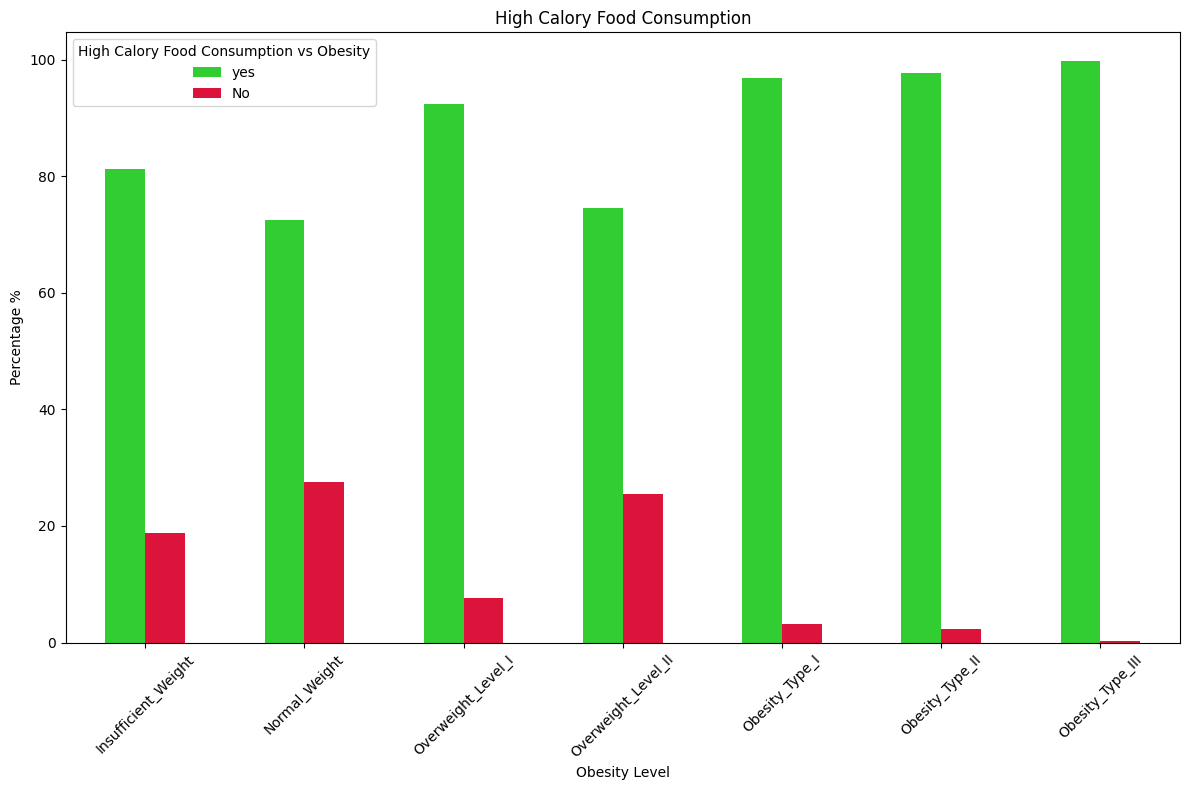

In [25]:
# Plot setup
ax = summary.plot(kind='bar', figsize=(12, 8), color=['limegreen', 'crimson'])

# Labels and title
plt.title('High Calory Food Consumption')
plt.xlabel('Obesity Level')
plt.ylabel('Percentage %')
plt.legend(title='High Calory Food Consumption vs Obesity', labels=['yes', 'No'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔁 Somers’ D (Somers' Correspondence Coefficient)

**Somers’ D** is a statistical measure used to assess the **strength and direction of association** between two **ordinal variables** — especially when one is treated as the **independent (predictor)** and the other as the **dependent (response)** variable.

---

#### 🧠 Key Concepts:

- Somers’ D evaluates how well the **ordering of one variable** (usually the predictor) helps predict the **ordering of another** (usually the outcome).
- It is based on **concordant and discordant pairs**:
  - A **concordant pair** is one where higher rank in X corresponds to higher rank in Y.
  - A **discordant pair** is the opposite.

---

#### 📐 Range and Interpretation:

| Value of Somers' D | Meaning                                  |
|--------------------|-------------------------------------------|
| **+1**             | Perfect positive monotonic relationship   |
| **0**              | No association                            |
| **–1**             | Perfect negative monotonic relationship   |









In [26]:
_Result = stats.somersd(df[FAVC],df[Obesity_Level])

print(f'Somers Correspondence Coefficient :: {_Result.statistic}\nP Value :: {_Result.pvalue}')

Somers Correspondence Coefficient :: 0.08584552792177964
P Value :: 0.08139327599522146


> **Somers’ D = 0.0858**, **p = 0.0814**

- The coefficient shows a **very weak positive association**
- But the **p-value > 0.05**, so the result is **not statistically significant**
- Conclusion: there is **no strong or reliable monotonic relationship** between the variables in this dataset

In [28]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [29]:
#feature encoding for the categorical features
dict={'no':0 , 'Sometimes':1 , 'Frequently':2 ,'Always':3 }
df['CAEC']=df['CAEC'].map(dict)
df['CALC']=df['CALC'].map(dict)


In [30]:
# One Hot Encoding
df=pd.get_dummies(df,prefix=['MTRANS'],columns=['MTRANS'],dtype=int)

In [31]:
df[Gender] = encode_binary(df[Gender],'Male')

In [32]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0.0,1.0,0,1,24.386526,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,3.0,0.0,1,1,24.238227,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,2.0,1.0,2,1,23.765432,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,2.0,0.0,2,5,26.851852,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0.0,0.0,1,6,28.342381,0,0,0,1,0
